In [1]:
import geemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import ee
import os

In [2]:
ee.Initialize()

Map = geemap.Map(center=[40,-100], zoom=4)

#Datasets to test on:
daymet_ga = ee.ImageCollection('NASA/ORNL/DAYMET_V4')

In [11]:
#Adding wetlands 

#GCE domain:
gce_clip = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GCE_domain.shp'
gce_lter = 'C:/Users/arj26323/Documents/Data/LTER shapefiles/GCE - Sapelo/GCE_LTER_boundary.shp'

lter = geemap.shp_to_ee(gce_lter)
wet_ga = geemap.shp_to_ee(gce_clip)
dmclip_ga = daymet_ga.map(lambda image: image.clip(wet_ga))

#Flux tower
#Note 1/18/23: Flux tower footprint (fluxproper) OR expanded flux area (fluxdiss)
gce_fluxdiss = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_fluxdissolve.shp'
gce_fluxproper = 'F:/Wetlands shapefiles/GCE flux tower/sapelo_yearly_climatology-2019.shp'
flux_ga = geemap.shp_to_ee(gce_fluxproper)

# Map.addLayer(dmclip_ga, {}, 'Daymet')

clip_0 = ee.Image(dmclip_ga.toList(dmclip_ga.size()).get(0)) ##Fist image in collection - need to specify date ranges

Map.addLayer(clip_0, {}, 'Daymet')
Map.addLayer(lter, {}, 'GCE')

Map.addLayer(flux_ga, {}, 'Flux tower footprint')
Map

Map(bottom=107386.0, center=[31.26195272205703, -81.02074308866202], controls=(WidgetControl(options=['positio…

In [4]:
# clip_0.getInfo()

In [12]:
# #GCE domain:
# est_clip = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_estuaries.shp'
# est_ga = geemap.shp_to_ee(est_clip)
# c2_ga = daymet_ga.map(lambda image: image.clip(est_ga))

# x_0 = ee.Image(c2_ga.toList(c2_ga.size()).get(0)) ##Fist image in collection - need to specify date ranges

# Map.addLayer(x_0, {}, 'Daymet')

<AxesSubplot:>

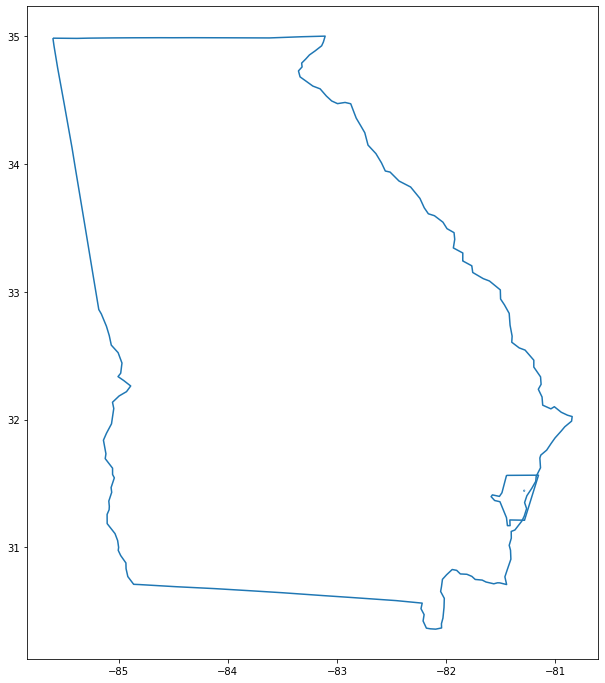

In [33]:
#Map of flux tower and GCE
import matplotlib.pyplot as plt
import geopandas as gpd

states = gpd.read_file('F:/US states/cb_2018_us_state_20m.shp').to_crs(4326)
states.crs

gce = gpd.read_file(gce_lter).to_crs(4326)
flux = gpd.read_file(gce_fluxproper).to_crs(4326)

fig, ax = plt.subplots (figsize = (12,12))
states[states['NAME'] == 'Georgia'].boundary.plot(ax = ax)
gce.boundary.plot(ax = ax)
flux.plot(ax = ax)

In [ ]:
#Map of flux tower and FLATS - average for year, or specific date? Which Landsat sensor?

In [ ]:
#Map of GCE and FLATS - average for year, or specific date? Which Landsat sensor?